### Part - 1 SpellCheker and Simmilarity Scores

#### Installing the required packages

In [1]:
%pip install docx

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
%pip install textract

  Using cached six-1.12.0-py2.py3-none-any.whl.metadata (1.9 kB)
Using cached six-1.12.0-py2.py3-none-any.whl (10 kB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.28.2 requires packaging<24,>=16.8, but you have packaging 24.0 which is incompatible.


In [3]:
%pip install PyPDF2

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


Including all the necessary libraries.

In [1]:
import PyPDF2
import textract
import docx2txt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer 

#### Resumes we are going to use during our analysis

In [4]:
resume1=docx2txt.process('D:\ResumeShardulproj\Resume-Analysis-using-NLP\Resume\machine-learning-intern-resume-example.docx')

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\padha\AppData\Local\Temp\ipykernel_15244\2379487887.py:1: SyntaxWarning: invalid escape sequence '\R'
  resume1=docx2txt.process('D:\ResumeShardulproj\Resume-Analysis-using-NLP\Resume\machine-learning-intern-resume-example.docx')


In [21]:
resume2=docx2txt.process('D:\ResumeShardulproj\Resume-Analysis-using-NLP\Resume\senior-machine-learning-engineer-resume-example.docx')

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\padha\AppData\Local\Temp\ipykernel_15244\4292712514.py:1: SyntaxWarning: invalid escape sequence '\R'
  resume2=docx2txt.process('D:\ResumeShardulproj\Resume-Analysis-using-NLP\Resume\senior-machine-learning-engineer-resume-example.docx')


#### Job Description can be entered by the user

In [ ]:
Proficiency in SQL and data visualization tools (e.g. Tableau, Looker, etc.) as well as standard NLP analysis tooling (e.g. Numpy, Pandas, Jupyter, etc.) Strong knowledge of statistics and experimental design 3+ years experience working with and analyzing large data sets to solve problems (Bonus: part of that with language/text data) The ability to communicate results clearly written, verbally, and via presentations Bonus: an advanced degree in a quantitative field (e.g., Statistics, Sciences, Engineering, CS, Math)

In [10]:
#embedded system 
Electronic circuit design, Raspberry-Pi, Espressif: ESP IOT Development Framework, 
Arduino IDE, Microcontroller programming, Linux device driver, low level peripheral interfacing, technical report writing, able to work independently as well as in a team

SyntaxError: invalid syntax (1462071487.py, line 2)

In [6]:
#Prompt for the Job description.
jd = input("Enter the job description: ")  

#### Function to get similarity score between resume and JD with the help of cosine similarity

In [22]:
def get_similarity(resume, jd):
    res = ''.join([i for i in resume if not i.isdigit()])
    res_jd=[res, jd]
    cntv = CountVectorizer()
    count_matrix = cntv.fit_transform(res_jd)
    percentage = round((cosine_similarity(count_matrix)[0][1] * 100),2)
    return percentage

#### Similarity score of first applicant

In [23]:
per1=get_similarity(resume2,jd)
print("\nSimilarity Scores: between resume 2 and Job Description is ",per1) 


Similarity Scores: between resume 2 and Job Description is  28.54


#### Similarity score of second applicant

In [24]:
per2=get_similarity(resume1,jd)
print("\nSimilarity Scores: between resume 1 and Job Description is ",per2) 


Similarity Scores: between resume 1 and Job Description is  50.03


#### Used Jaccard distance as a dissimmilarity measure to see how different the resume and JD are

In [26]:
def jaccard_distance(resume1,jd):
    intersection=len(set.intersection(*[set(resume1),set(jd)]))
    union=len(set.union(*[set(resume1),set(jd)]))
    return intersection/float(union)
b=jaccard_distance(resume2,jd) 
c=jaccard_distance(resume1,jd)
print('\n  Jaccard  :  ', b) 
print('\n  Jaccard  :  ', c)   


  Jaccard  :   0.5675675675675675

  Jaccard  :   0.5394736842105263


#### Function to do SpellCheker in the resume

In [18]:
%pip install spellchecker

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [15]:
%pip install pyspellchecker


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [16]:
%pip show spellchecker

Name: spellchecker
Version: 0.4
Summary: Indian Language Spellchecker Library
Home-page: http://silpa.org.in/Spellchecker
Author: Santhosh Thottingal
Author-email: santhosh.thottingal@gmail.com
License: LGPL-3.0
Location: c:\Users\padha\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: inexactsearch, setuptools
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [13]:
from spellchecker import SpellChecker
spell = SpellChecker() 

In [14]:
from spellchecker import SpellChecker

def spell_check(word_list):
    spell = SpellChecker()
    spell_mistake = False
    
    # Add domain-specific or technical terms to the dictionary
    custom_dictionary = ["cybersecurity", "Docker","bioinformaticians", "dataset","preprocessing","preprocess","app","apps",
                         "machine learning model","Machine Learning","speciﬁc","analytics","numpy","matplotlib","Arduino","Education","Summary","numPy","pandas","matplotlib","seaborn","Raserry Pi"]
    for term in custom_dictionary:
        spell.word_frequency.add(term.lower())
    
    for word in word_list:
        if word.isalpha() and not word[0].isupper():
            corrected_word = spell.correction(word)
            
            if corrected_word != word:
                print('Wrong spelling:', word)
                suggestions = spell.candidates(word)
                if suggestions:
                    print('Suggestions:', suggestions)
                else:
                    print('No suggestions available')
                spell_mistake = True
    
    if not spell_mistake:
        print('No spelling mistakes, good to go..')

In [27]:
word = resume1.split()
# word=resume1.split()

In [28]:
word2=resume2.split()


In [29]:
spell_check(word2)

No spelling mistakes, good to go..


In [30]:
spell_check(word)

Wrong spelling: cybersecuritie
Suggestions: {'cybersecurity'}
Wrong spelling: preproces
Suggestions: {'preprocess'}


### Part - 2 Summarizing Resume and Finding Important Keywords

#### Libraries required for summarizing the resume

In [21]:
%pip install gensim

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [89]:
# from gensim.summarization.summarizer import summarize
# from gensim.summarization import keywords

#### Summarizing resume

%pip install sumy


In [23]:
%pip install sumy


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/97.3 kB ? eta -:--:--
   ------------------------- -------------- 61.4/97.3 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 97.3/97.3 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.2 MB 8.0 MB/s eta 0:00:01
   --- ------------------------------------ 0.5/6.2 MB 6.0 MB/s eta 0:00:01
   --------- ------------------------------ 1.5/6.2 MB 10.4 MB/s eta 0:00:01
   --------------- ------------------------ 2.4/6.2 MB 11.7 MB/s eta 0:00:01
   --------------------- ------------------ 3.3/6.2 MB 13.3 MB/s eta 0:00:01
   ----------------------------- ---------- 4.6/6.2 MB 15.5 MB/s eta 0:00:01
   ------------------------------------ -

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


Summarization of Resume

In [31]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

# Convert resume1 to string
# text_resume = str(resume1)
text_resume = str(resume1)

# Initialize the parser
parser = PlaintextParser.from_string(text_resume, Tokenizer("english"))

# Initialize the summarizer
summarizer = LsaSummarizer()

# Summarize the resume
resume_summary = summarizer(parser.document, sentences_count=9)  # Adjust the number of sentences as needed

# Print the summarized resume
for sentence in resume_summary:
    print(sentence)

Aspiring machine learning intern seeking a role in Duo Security, where I can use my expertise in data entry and project contributions to improve object recognition accuracy.
Designed automated data validation scripts in Python with Pandas, reducing manual error checks by 72% and accelerating the speed of data entry by 29%.
Built interactive Jupyter notebooks with embedded code cells for real-time model demonstrations in class.
Created data visualizations using Matplotlib to illustrate the project's dataset distribution.
Conducted weekly one-on-one training sessions, resulting in a 94% improvement rate in seniors' ability to make calls, send texts, and use apps as per feedback.
Led Microsoft Ofﬁce workshops for seniors interested in acquiring more specialized skills, such as mail merge and pivot tables, aligning to their speciﬁc needs.
Assisted seniors in setting up 27 email accounts, helping them communicate with family and friends online.
Supported 11 seniors in setting up their Googl

#### Performed feature extraction with the help of count vectorizer

In [32]:
text_list = [resume_summary, jd]  # Assuming 'jd' represents the job description
text_list = [str(text) for text in text_list]  # Convert each element to string
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
count_matrix = cv.fit_transform(text_list)


In [33]:
count_matrix

<2x172 sparse matrix of type '<class 'numpy.int64'>'
	with 185 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn.metrics.pairwise import cosine_similarity
matchPercentage = cosine_similarity(count_matrix)
print(matchPercentage)

[[1.         0.38615095]
 [0.38615095 1.        ]]


In [35]:
# get the match percentage
matchPercentage = cosine_similarity(count_matrix)[0][1] * 100
matchPercentage = round(matchPercentage, 2) 
print("Your resume matches about "+ str(matchPercentage)+ "% of the job description.")

Your resume matches about 38.62% of the job description.


#### Extracted important keywords from JD and resume 

In [22]:
%pip install gensim==3.8.3


  Using cached gensim-3.8.3.tar.gz (23.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for gensim
Failed to build gensim
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [753 lines of output]
      c:\Users\padha\AppData\Local\Programs\Python\Python312\Lib\site-packages\setuptools\__init__.py:80: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
      !!
      
              ********************************************************************************
              Requirements should be satisfied by a PEP 517 installer.
              If you are using pip, you can try `pip install --use-pep517`.
              ********************************************************************************
      
      !!
        dist.fetch_build_eggs(dist.setup_requires)
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-312
      creating build\lib.win-amd64-cpython-312\gensim
      copying gensim\downloader.py -> build\lib.win-amd64-c

In [ ]:
from gensim.summarization import keywords

In [ ]:
a = keywords(jd, ratio=0.7)
a

In [40]:
b = keywords(resume1, ratio =0.7)
b

'data\ndetection\ndetects\nfatigue\nfatigued\nmodeling\nmodel\nfeature\nfeatures\nproject\nprojects\nteam\nsegmentation\nfraud\nstatistical\nassociate\nassociation\nexperience leveraging machine learning models\ntechniques\nincome\ncompelling\ndefaulters\ndefault\nprices\ngithub\nenron\nstatements\nproblem\nsampling technique\nuniversity\nimproved academic performance\nagriculture equipment manufacturing\nlab\nflorida\nanalyst\nmatlab\nprasanth\ntoolbox\nfinal price\nbusiness\netl application\naug\nassistant\nreduction\nscikitlearn\nsql\nreddy\nteaching\npresent\ncalifornia\ngraduate\ndriver\nneural\nhadoop\nnov\ngrowth\ntechnologies\npatur\nload\ntensorflow\nbuilt multiple\nprovided\nproduct\nproducts\ntech\nregistered\ncross\nelectronics\ncgs\nfraudulent\npower\ndataset\npassionate advocate\nsas\nactivity\nimbalanced\nhyper tuning\nhousing\nbenchmarked\nspark\nvishnuprasanth\npreparation turnover\nkeras\noracle\ncard\nled\nhue\nudacity certified\ndeep\njune\nlinkedin\ngpa\nperson\nsk

In [41]:
c = []
for i in a.split('\n'):
    for j in i.split(' '):
        c.append(j)
print(c)        

['pandas', 'sciences', 'data', 'visualization', 'tools', 'problems', 'bonus', 'design', 'written', 'years', 'experience', 'results', 'clearly', 'large', 'nlp', 'analysis', 'tooling', 'strong', 'knowledge', 'quantitative', 'field', 'advanced', 'degree', 'tableau', 'looker', 'statistics', 'engineering']


In [42]:
d = []
for i in b.split('\n'):
    for j in i.split(' '):
        d.append(j)
print(d)

['data', 'detection', 'detects', 'fatigue', 'fatigued', 'modeling', 'model', 'feature', 'features', 'project', 'projects', 'team', 'segmentation', 'fraud', 'statistical', 'associate', 'association', 'experience', 'leveraging', 'machine', 'learning', 'models', 'techniques', 'income', 'compelling', 'defaulters', 'default', 'prices', 'github', 'enron', 'statements', 'problem', 'sampling', 'technique', 'university', 'improved', 'academic', 'performance', 'agriculture', 'equipment', 'manufacturing', 'lab', 'florida', 'analyst', 'matlab', 'prasanth', 'toolbox', 'final', 'price', 'business', 'etl', 'application', 'aug', 'assistant', 'reduction', 'scikitlearn', 'sql', 'reddy', 'teaching', 'present', 'california', 'graduate', 'driver', 'neural', 'hadoop', 'nov', 'growth', 'technologies', 'patur', 'load', 'tensorflow', 'built', 'multiple', 'provided', 'product', 'products', 'tech', 'registered', 'cross', 'electronics', 'cgs', 'fraudulent', 'power', 'dataset', 'passionate', 'advocate', 'sas', 'ac

#### Function to see whether resume covers all the important keywords mentioned in JD

In [43]:
present = []
absent = []
for i in c:
    if i in d:
        present.append(i) 
    else:
        absent.append(i)
print("Present words are: ", present)
print("Absent words are: ", absent)

Present words are:  ['data', 'visualization', 'experience', 'analysis']
Absent words are:  ['pandas', 'sciences', 'tools', 'problems', 'bonus', 'design', 'written', 'years', 'results', 'clearly', 'large', 'nlp', 'tooling', 'strong', 'knowledge', 'quantitative', 'field', 'advanced', 'degree', 'tableau', 'looker', 'statistics', 'engineering']


### Part-3 Classification of Skills 

In [36]:
from spacy.matcher import PhraseMatcher

In [37]:
#D:\ResumeShardulproj\Resume-Analysis-using-NLP\Resume\EmbeddedSystem.docx
pdfFileObj = open('D:\ResumeShardulproj\Resume-Analysis-using-NLP\Resume\EmbeddedSystem.pdf','rb')

<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\R'
C:\Users\padha\AppData\Local\Temp\ipykernel_15244\1473491381.py:2: SyntaxWarning: invalid escape sequence '\R'
  pdfFileObj = open('D:\ResumeShardulproj\Resume-Analysis-using-NLP\Resume\EmbeddedSystem.pdf','rb')


In [38]:
# pdfFileObj = open('D:\ResumeShardulproj\Resume-Analysis-using-NLP\Resume\machine-learning-intern-resume-example.pdf','rb')
pdfFileObj2 = open('D:\ResumeShardulproj\Resume-Analysis-using-NLP\Resume\machine-learning-intern-resume-example.pdf','rb')

<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\R'
C:\Users\padha\AppData\Local\Temp\ipykernel_15244\126337187.py:2: SyntaxWarning: invalid escape sequence '\R'
  pdfFileObj2 = open('D:\ResumeShardulproj\Resume-Analysis-using-NLP\Resume\machine-learning-intern-resume-example.pdf','rb')


In [39]:
pdfReader2=PyPDF2.PdfReader(pdfFileObj2)

In [40]:
pdfReader = PyPDF2.PdfReader(pdfFileObj)

In [41]:
text=""
text2=""
count=0

In [42]:
num_pages = 1

In [43]:
#for resume2
while count < num_pages:
    pageObj = pdfReader2.pages[count]
    count +=1
    text2 += pageObj.extract_text()

In [44]:
count=0
while count < num_pages:
    pageObj = pdfReader.pages[count]
    count +=1
    text += pageObj.extract_text()

In [45]:
import re
import string
text = text.lower()
text = re.sub(r'\d+','',text)
text = text.translate(str.maketrans('','',string.punctuation))

In [46]:
import re
import string
text2 = text2.lower()
text2 = re.sub(r'\d+','',text2)
text2 = text2.translate(str.maketrans('','',string.punctuation))

In [47]:
# Created dictionary with 7 different domains of technology...

terms = {
    'Embedded System':['Electronic', 'circuit design', 'Raspberry-Pi', 'Espressif: ESP IOT Development Framework', 'Arduino IDE', 
                       'Microcontroller programming', 'Linux device driver', 'low level peripheral interfacing',
                       'technical report writing', 'able to work independently as well as in a team','IoT',
                       'Circuit Design','Digital Electronics','Analog','Eagle','custom-made PCB',' Proteus','Tinkercad','ESP32','PCB'],
    'Data Scientists':['Data analysis', 'Statistical analysis', 'Data visualization', 'Machine learning', 
                       'Python programming', 'R programming', 'SQL', 'Big data', 'Natural Language Processing (NLP)', 
                       'Deep Learning', 'Neural Networks', 'Computer Vision', 'Time Series Analysis', 
                       'Predictive Modeling', 'Unsupervised Learning', 'Reinforcement Learning', 
                       'Dimensionality Reduction', 'Feature Engineering', 'A/B Testing', 
                       'Experimental Design', 'Algorithm development', 'Model evaluation', 
                       'Data cleaning', 'Data preprocessing', 'Data mining', 'Hypothesis testing',
                       'Bayesian statistics', 'Optimization algorithms', 'TensorFlow','YOLOv5',
                       'Tokenization', 'Stemming' , 'spacy' , 'fuzzywuzzy'],
   
    'Data Engineering & Warehousing ':['build', 'maintain', 'data', 'pipelines', 'engineering', 'organize', 
                                            'large','integrity','testing', 'validation', 'Postgres DBs', 'Kinesis',  
                                            'APIs', 'Gathering', 'ETL', 'Modeling','data warehouse', 'integrate', 
                                            'SQL', 'Server', 'design', 'solution', 'ad-hoc', 'streamline','extraction', 
                                            'troubleshoot', 'architecture', 'endpoints', 'development', 'lake', 'architecture',
                                            'databases', 'NoSQL', 'exploration'],      
        'Data Mining & Statistical Analysis':['SAS', 'ANOVA', 'statistical', 'methodologies', 'regression', 'data mining',
                                             'problem-solving', 'theories', 'test', 'hypotheses', 'anamoly-detection',
                                             'SPSS', 'RStudio', 'quantitative', 'analyses', 'model', 'mathematics', 'statistic',
                                             'techniques', 'Bayesian', 'research', 'sampling', 'findings', 'analysis', 'R',
                                             'conduct', 'insights', 'statistical integrity', 'math', 'identify', 'analyze',
                                             'trend', 'stake-holders', 'MATLAB', 'Inferential Statistics','Multivariate Analysis', 
                                              'Linear','Non-linear', 'mortality', 'risk factors', 'survey'],
        'Cloud & Distributed Computing':['multi-cloud', 'develop','cloud solutions', 'domain','architects', 'technical', 'cloud',
                                        'architecture','engineering', 'TOGAF','Zachman', 'Policies','Governance', 'Strategies',
                                        'AWS', 'Redshift', 'PostgresQL', 'Oracle', 'cloud based', 'OLTP''metadata','OLAP', 'GCP',
                                        'Spark', 'APIs', 'Python', 'framework', 'understanding', 'data-driven', 'Azure', 'platform',
                                        'design', 'domain', 'tool', 'trend', 'deployment', 'application','build','environment','DevOps',
                                         'pipeline', 'manage', 'server', 'services'],
        'ML & AI':['structured', 'unstructured', 'kafka', 'spark', 'datapieline', 'big data','technologies', 'hive','hadoop','PySpark', 
                   'Python', 'SQL', 'MySQL', 'databases','tools', 'AWS', 'GCP', 'information retrieval', 'machine learning', 'features', 
                   'engineering','data mining', 'data processing', 'large', 'NLP', 'text', 'analytical skills', 'deployment','Git', 'Linux', 
                   'Windows','C','C++','Java','DevOps','distributed', 'software','development','requirements', 'experience', 'Tensor Flow', 
                   'PyTorch','supervised', 'unsupervised', 'building','evaluation', 'ML libraries','frameworks', 'exploratory analyses',
                   'traditional','techniques','AI', 'algorithms', 'analyze', 'develop', 'evaluate','classification','library'],
        'Data Visualization':['analytics','BI Tools','chart','big data','business intelligence','power BI','BOBJ','visualization','data',
                              'database','data mining','data science','charts','hadoop','graphs','MS Excel','pivot-tables','machine learning',
                              'creative','nosql','nlp','predictive','insights','python','r','sql','tableau','text mining','findings', 'communication', 
                              'skills', 'statistical', 'data-driven', 'SPSS', 'Alteryx', 'business', 'identify', 'dashboard','Bash','statistical',
                             'resolve', 'translate', 'summerize', 'analyst', 'ggplot2', 'reporting', 'business', 'result']}


In [48]:
#trial purpose
de = 0
dm = 0
cc = 0
mlai = 0
dv = 0
es = 0
ds = 0
scores = []

for area in terms.keys():
    if area == 'Data Engineering & Warehousing':
        for word in terms[area]:
            if word.lower() in text.lower():
                de += 1
        scores.append(de)
    elif area == 'Data Mining & Statistical Analysis':
        for word in terms[area]:
            if word.lower() in text.lower():
                dm += 1
        scores.append(dm)
    elif area == 'Embedded System':
        for word in terms[area]:
            if word.lower() in text.lower():
                es += 1
        scores.append(es)
    elif area == 'Data Science':
        for word in terms[area]:
            if word.lower() in text.lower():
                ds += 1
        scores.append(ds)
    elif area == 'Cloud & Distributed Computing':
        for word in terms[area]:
            if word.lower() in text.lower():
                cc += 1
        scores.append(cc)
    elif area == 'ML & AI':
        for word in terms[area]:
            if word.lower() in text.lower():
                mlai += 1
        scores.append(mlai)
    else:
        for word in terms[area]:
            if word.lower() in text.lower():
                dv += 1
        scores.append(dv)


In [49]:
#trial2
#trial purpose
de = 0
dm = 0
cc = 0
mlai = 0
dv = 0
es = 0
ds = 0
scores2 = []

for area in terms.keys():
    if area == 'Data Engineering & Warehousing':
        for word in terms[area]:
            if word.lower() in text2.lower():
                de += 1
        scores2.append(de)
    elif area == 'Data Mining & Statistical Analysis':
        for word in terms[area]:
            if word.lower() in text2.lower():
                dm += 1
        scores2.append(dm)
    elif area == 'Embedded System':
        for word in terms[area]:
            if word.lower() in text2.lower():
                es += 1
        scores2.append(es)
    elif area == 'Data Science':
        for word in terms[area]:
            if word.lower() in text2.lower():
                ds += 1
        scores2.append(ds)
    elif area == 'Cloud & Distributed Computing':
        for word in terms[area]:
            if word.lower() in text2.lower():
                cc += 1
        scores2.append(cc)
    elif area == 'ML & AI':
        for word in terms[area]:
            if word.lower() in text2.lower():
                mlai += 1
        scores2.append(mlai)
    else:
        for word in terms[area]:
            if word.lower() in text2.lower():
                dv += 1
        scores2.append(dv)

In [50]:
summary = pd.DataFrame(scores,index=terms.keys(),columns=['score']).sort_values(by='score',ascending=False)
summary

,score
Data Visualization,16
ML & AI,12
Embedded System,10
Data Engineering & Warehousing,8
Cloud & Distributed Computing,7
Data Scientists,2
Data Mining & Statistical Analysis,2


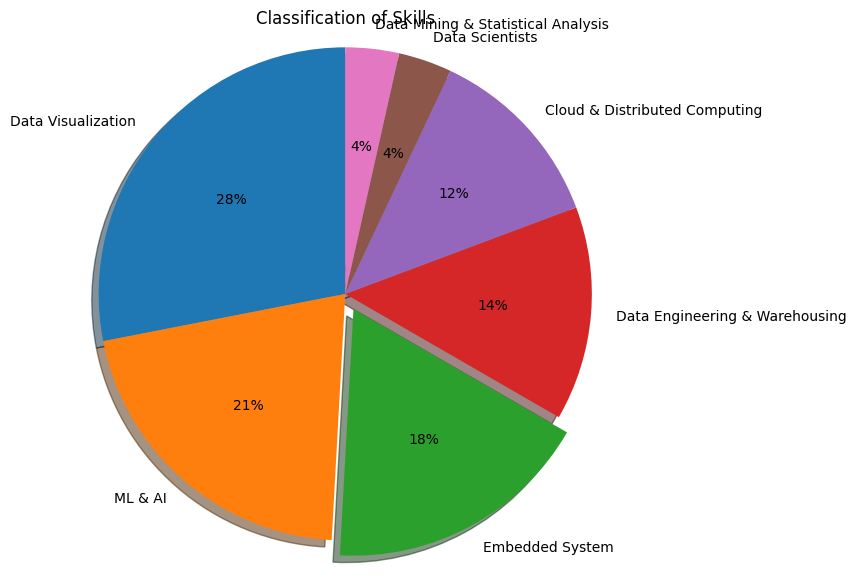

In [51]:
pie = plt.figure(figsize=(7,7))
plt.pie(summary['score'], labels=summary.index, explode = (0,0,0.07,0,0,0,0), autopct='%1.0f%%',shadow=True,startangle=90)
plt.title('Classification of Skills')
plt.axis('equal')
plt.show()

In [52]:
s = pd.DataFrame(scores2,index=terms.keys(),columns=['score']).sort_values(by='score',ascending=False)
s

,score
Data Visualization,16
Data Engineering & Warehousing,9
ML & AI,8
Data Scientists,4
Data Mining & Statistical Analysis,4
Cloud & Distributed Computing,4
Embedded System,0


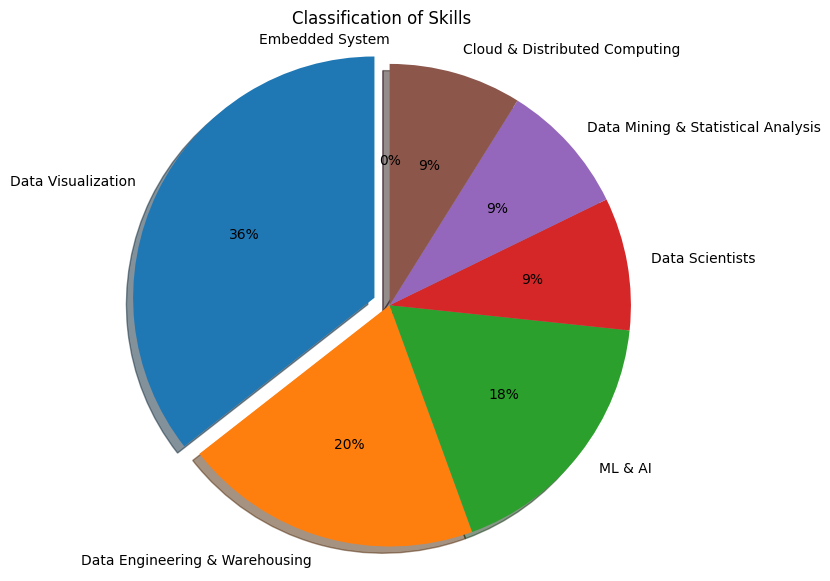

In [53]:
pie = plt.figure(figsize=(7,7))
plt.pie(s['score'], labels=s.index, explode = (0.07,0,0,0,0,0,0), autopct='%1.0f%%',shadow=True,startangle=90)
plt.title('Classification of Skills') 
plt.axis('equal')
plt.show()

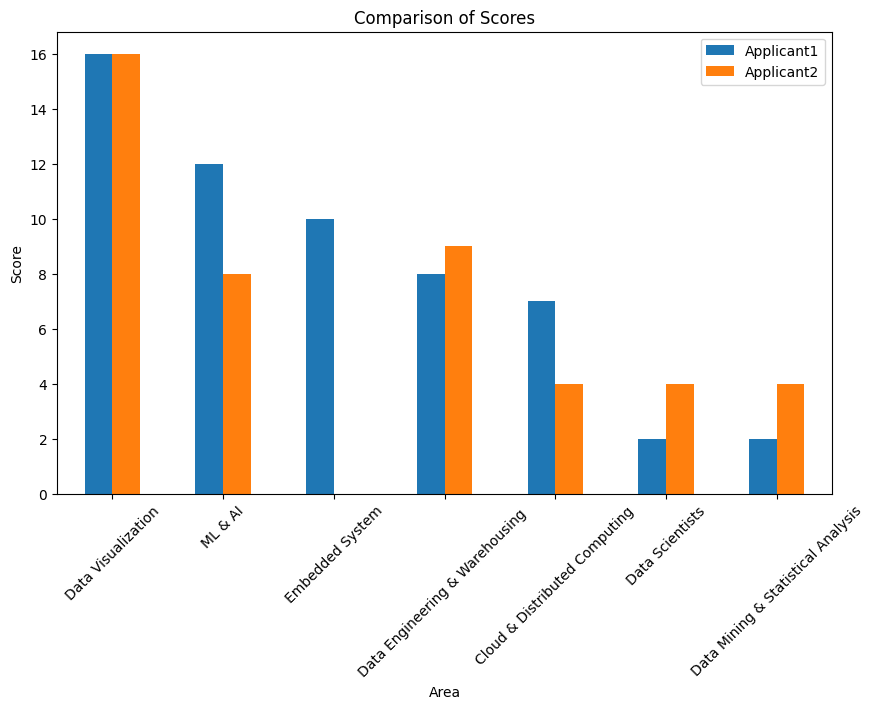

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
comparison_df = pd.concat([summary, s], axis=1)
comparison_df.columns = ['Applicant1', 'Applicant2']  # Rename the columns

# Plotting the bar graph
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Scores')
plt.xlabel('Area')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

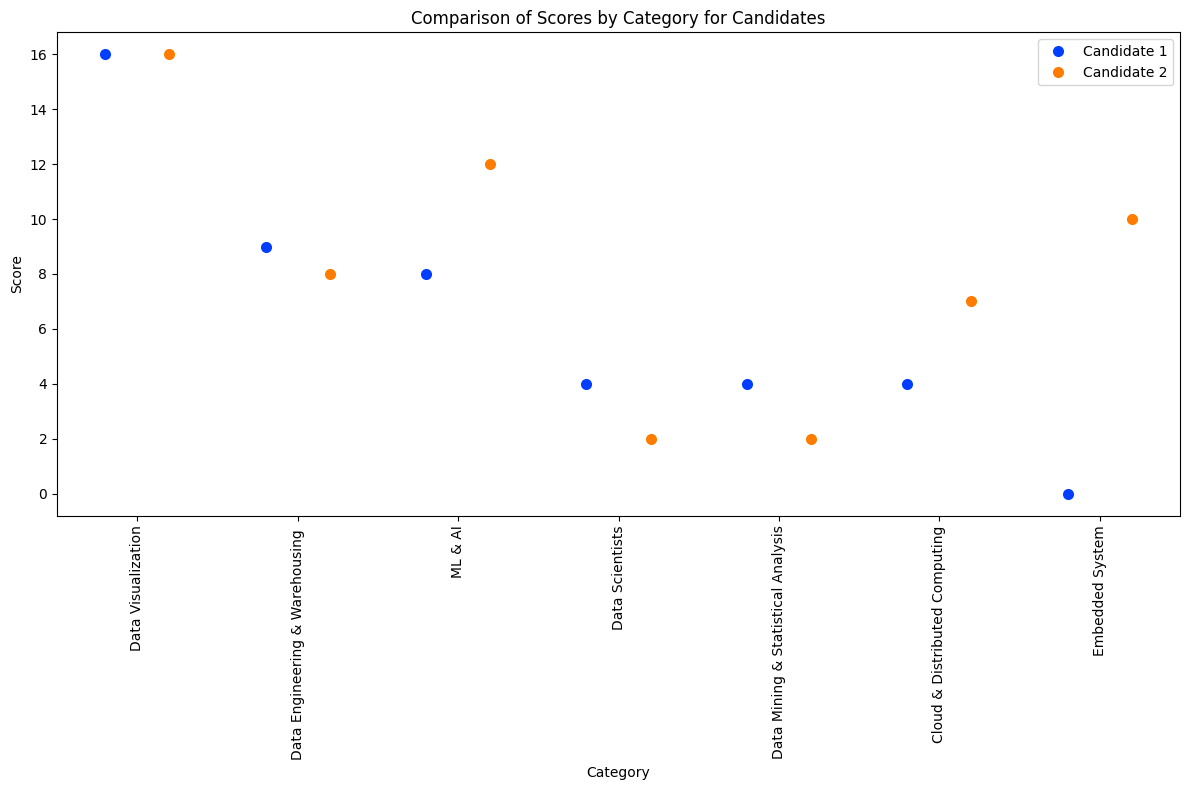

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine both DataFrames
combined_df = pd.concat([s, summary], axis=1)
combined_df.columns = ['Candidate 1', 'Candidate 2']
combined_df = combined_df.reset_index().melt(id_vars='index', var_name='Candidate', value_name='Score')

# Plotting
plt.figure(figsize=(12, 8))
sns.stripplot(data=combined_df, x='index', y='Score', hue='Candidate', palette='bright', dodge=True, size=8)

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Comparison of Scores by Category for Candidates')

# Rotate x-axis labels vertically
plt.xticks(rotation=90, ha='center')

# Adjust legend location
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
